<a href="https://colab.research.google.com/github/Avadhi-Singhal/MachineLearning/blob/LogisticRegression/LogisticRgressionForMulticlassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

In [4]:
## create the dataset
x,y = make_classification(n_samples=1000,n_features=10,n_informative=3,n_classes=3,random_state=10)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(multi_class = 'ovr')

In [8]:
logistic.fit(x_train,y_train)
y_pred = logistic.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [9]:
y_pred

array([1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1, 0,
       2, 1, 2, 2, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 1, 1,
       0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1,
       1, 2, 0, 2, 1, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 2,
       2, 2, 2, 1, 0, 2, 1, 0, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 1, 2, 1, 1, 0, 0, 2, 2,
       0, 1, 0, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 2, 2, 2, 0, 1, 1,
       0, 2, 0, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 1, 0, 1, 2, 2, 0, 2, 1, 2,
       2, 0, 0, 1, 2, 1, 0, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 1, 1, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 1, 0, 1, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 2,
       2, 2, 1, 0, 2, 0, 1, 1, 1, 0, 2, 2, 0, 0])

In [11]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [12]:
score = accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.63
              precision    recall  f1-score   support

           0       0.60      0.59      0.59        98
           1       0.69      0.64      0.66        99
           2       0.61      0.66      0.63       103

    accuracy                           0.63       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.63      0.63      0.63       300

[[58 15 25]
 [17 63 19]
 [22 13 68]]


# Logistic Regression for Imbalanced Dataset

In [13]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification

In [16]:
x,y = make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,
                          n_redundant=0,weights=[0.99],random_state=10)
# by defaut n_classes = 2 ---> binary classification ---> output feature will have two classes

In [17]:
x

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [18]:
Counter(y)

Counter({0: 9846, 1: 154})

<Axes: xlabel='feature_1', ylabel='feature_2'>

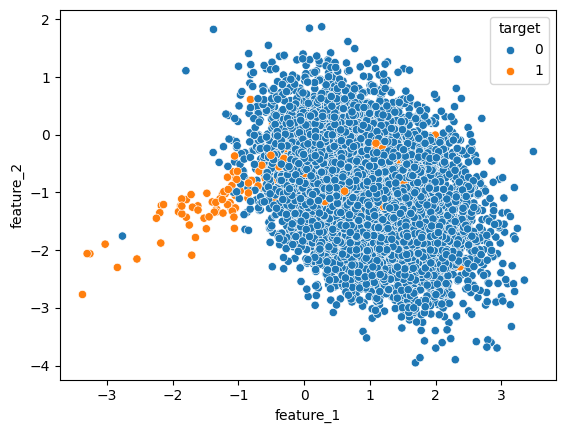

In [22]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame(x,columns=['feature_1','feature_2'])
df['target']=y
sns.scatterplot(data=df,x='feature_1',y='feature_2',hue='target')

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg','lbfgs','liblinear','sag','saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [25]:
params = dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [26]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [27]:
grid.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [28]:
grid.best_params_

{'C': 100,
 'class_weight': {0: 50, 1: 100},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [29]:
y_pred = grid.predict(x_test)

In [30]:
score = accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9896
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2491
           1       0.26      1.00      0.41         9

    accuracy                           0.99      2500
   macro avg       0.63      0.99      0.70      2500
weighted avg       1.00      0.99      0.99      2500

[[2465   26]
 [   0    9]]
